# 2021/10/20
# 本代码绘制famil控制实验以及其他三组敏感性实验的风向角转变对比图
# 选取层次为850hpa


In [1]:
import xarray as xr
import numpy as np
import os
import math
import sys
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *

np.set_printoptions(suppress=True)

# 计算风向角函数

In [2]:
def cal_jan_angle(u,v):
    u_jan      =  np.average(u[0:31,:],axis=0)
    v_jan      =  np.average(v[0:31,:],axis=0)
    angle_jan  =  u_jan.copy()
    for i in range(0,u_jan.shape[0]):
        for j in range(0,u_jan.shape[1]):
            if (u_jan[i,j]==0 and v_jan[i,j]<0):
                angle_jan[i,j] = 0 ; continue
            elif (u_jan[i,j]==0 and v_jan[i,j]>0):
                angle_jan[i,j] = 180 ; continue
                
            if u_jan[i,j] >0:
                angle_jan[i,j]  =  270 - math.degrees(np.arctan(v_jan[i,j]/u_jan[i,j]))
            else:
                angle_jan[i,j]  =  90  - math.degrees(np.arctan(v_jan[i,j]/u_jan[i,j]))

    return angle_jan

def cal_angle(u,v):
    angle  =  u.copy()
    for i in range(0,u.shape[0]):
        for j in range(0,u.shape[1]):
            if (u[i,j]==0 and v[i,j]<0):
                angle[i,j] = 0 ; continue
            elif (u[i,j]==0 and v[i,j]>0):
                angle[i,j] = 180 ; continue
                
            if u[i,j] >0:
                angle[i,j]  =  270 - math.degrees(np.arctan(v[i,j]/u[i,j]))
            else:
                angle[i,j]  =  90  - math.degrees(np.arctan(v[i,j]/u[i,j]))

    return angle

# 计算famil的控制实验


In [3]:
path  =  "/home/sun/qomo-data/zhuang_plev/"
lat_slice   =   slice(0,30)
lon_slice   =   slice(90,100)

levs  =  [1000,975,950,925,850]
import math
u     =  xr.open_dataset(path+"plev_con_U.nc").sel(lat=lat_slice,lon=lon_slice,lev=850)
v     =  xr.open_dataset(path+"plev_con_V.nc").sel(lat=lat_slice,lon=lon_slice,lev=850)

angle_jan  =  cal_jan_angle(u.U.data,v.V.data)
#这里计算风向角计算全年的吧
angle      =  u.U.data.copy()
for d in range(0,angle.shape[0]):
    angle[d,:]  =  cal_angle(u.U.data[d,:],v.V.data[d,:])
#计算侯平均
angle_pen  =  np.zeros((73,angle.shape[1],angle.shape[2]))
angle_diff =  angle_pen.copy()
for p in range(0,73):
    angle_pen[p,:]  =  np.average(angle[p*5:(p*5+5),:],axis=0)
    angle_diff[p,:] =  angle_pen[p,:] - angle_jan

angle_mask   = angle_diff.copy()
for i in range(0,angle_mask.shape[0]):
    for j in range(0,angle_mask.shape[1]):
        for z in range(0,angle_mask.shape[2]):
            if angle_mask[i,j,z] > 180:
                angle_diff[i,j,z]  =  abs(angle_diff[i,j,z]-360)
            if angle_diff[i,j,z] < -180:
                angle_diff[i,j,z]  =  abs(angle_diff[i,j,z]+360)
    

angle_diff_avg_lat  =  np.average(angle_diff,axis=2)

# IC实验

In [4]:
u     =  xr.open_dataset(path+"plev_ic_U.nc").sel(lat=lat_slice,lon=lon_slice,lev=850)
v     =  xr.open_dataset(path+"plev_ic_V.nc").sel(lat=lat_slice,lon=lon_slice,lev=850)

angle_ic_jan  =  cal_jan_angle(u.U.data,v.V.data)
#这里计算风向角计算全年的吧
angle_ic      =  u.U.data.copy()
for d in range(0,angle_ic.shape[0]):
    angle_ic[d,:]  =  cal_angle(u.U.data[d,:],v.V.data[d,:])
#计算侯平均
angle_ic_pen  =  np.zeros((73,angle_ic.shape[1],angle_ic.shape[2]))
angle_ic_diff =  angle_ic_pen.copy()
for p in range(0,73):
    angle_ic_pen[p,:]  =  np.average(angle_ic[p*5:(p*5+5),:],axis=0)
    angle_ic_diff[p,:] =  angle_ic_pen[p,:] - angle_ic_jan

angle_ic_mask   = angle_ic_diff.copy()
for i in range(0,angle_ic_mask.shape[0]):
    for j in range(0,angle_ic_mask.shape[1]):
        for z in range(0,angle_ic_mask.shape[2]):
            if angle_ic_mask[i,j,z] > 180:
                angle_ic_diff[i,j,z]  =  abs(angle_ic_diff[i,j,z]-360)
            if angle_ic_diff[i,j,z] < -180:
                angle_ic_diff[i,j,z]  =  abs(angle_ic_diff[i,j,z]+360)
    

angle_ic_diff_avg_lat  =  np.average(angle_ic_diff,axis=2)

# ID实验

In [5]:
u     =  xr.open_dataset(path+"plev_id_U.nc").sel(lat=lat_slice,lon=lon_slice,lev=850)
v     =  xr.open_dataset(path+"plev_id_V.nc").sel(lat=lat_slice,lon=lon_slice,lev=850)

angle_id_jan  =  cal_jan_angle(u.U.data,v.V.data)
#这里计算风向角计算全年的吧
angle_id      =  u.U.data.copy()
for d in range(0,angle_id.shape[0]):
    angle_id[d,:]  =  cal_angle(u.U.data[d,:],v.V.data[d,:])
#计算侯平均
angle_id_pen  =  np.zeros((73,angle_id.shape[1],angle_id.shape[2]))
angle_id_diff =  angle_id_pen.copy()
for p in range(0,73):
    angle_id_pen[p,:]  =  np.average(angle_id[p*5:(p*5+5),:],axis=0)
    angle_id_diff[p,:] =  angle_id_pen[p,:] - angle_id_jan

angle_id_mask   = angle_id_diff.copy()
for i in range(0,angle_id_mask.shape[0]):
    for j in range(0,angle_id_mask.shape[1]):
        for z in range(0,angle_id_mask.shape[2]):
            if angle_id_mask[i,j,z] > 180:
                angle_id_diff[i,j,z]  =  abs(angle_id_diff[i,j,z]-360)
            if angle_id_diff[i,j,z] < -180:
                angle_id_diff[i,j,z]  =  abs(angle_id_diff[i,j,z]+360)
    

angle_id_diff_avg_lat  =  np.average(angle_id_diff,axis=2)

# ICID实验

In [6]:
u     =  xr.open_dataset(path+"plev_icid_U.nc").sel(lat=lat_slice,lon=lon_slice,lev=850)
v     =  xr.open_dataset(path+"plev_icid_V.nc").sel(lat=lat_slice,lon=lon_slice,lev=850)

angle_icid_jan  =  cal_jan_angle(u.U.data,v.V.data)
#这里计算风向角计算全年的吧
angle_icid      =  u.U.data.copy()
for d in range(0,angle_icid.shape[0]):
    angle_icid[d,:]  =  cal_angle(u.U.data[d,:],v.V.data[d,:])
#计算侯平均
angle_icid_pen  =  np.zeros((73,angle_icid.shape[1],angle_icid.shape[2]))
angle_icid_diff =  angle_icid_pen.copy()
for p in range(0,73):
    angle_icid_pen[p,:]  =  np.average(angle_icid[p*5:(p*5+5),:],axis=0)
    angle_icid_diff[p,:] =  angle_icid_pen[p,:] - angle_icid_jan

angle_icid_mask   = angle_icid_diff.copy()
for i in range(0,angle_icid_mask.shape[0]):
    for j in range(0,angle_icid_mask.shape[1]):
        for z in range(0,angle_icid_mask.shape[2]):
            if angle_icid_mask[i,j,z] > 180:
                angle_icid_diff[i,j,z]  =  abs(angle_icid_diff[i,j,z]-360)
            if angle_icid_diff[i,j,z] < -180:
                angle_icid_diff[i,j,z]  =  abs(angle_icid_diff[i,j,z]+360)
    

angle_icid_diff_avg_lat  =  np.average(angle_icid_diff,axis=2)

In [7]:
# 开始绘图

/tmp/ipykernel_1817552/175180598.py:99: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbc = plt.colorbar(h, cax=cb,orientation='horizontal',shrink=0.5, fraction=0.01,pad=0.05, aspect=20,extend='both',extendfrac='auto',)


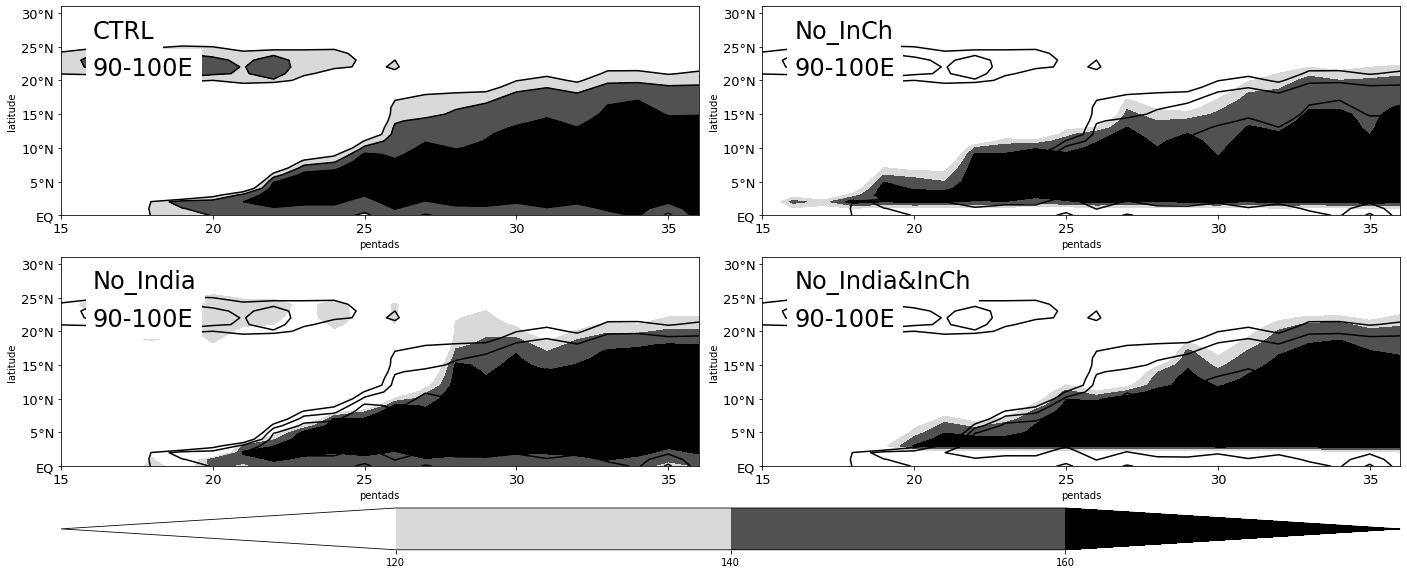

In [8]:
import matplotlib.pyplot as plt
fig1    =  plt.figure(figsize=(24,10))
spec1   =  fig1.add_gridspec(nrows=7,ncols=2)

ax = fig1.add_subplot(spec1[0:3,0])
props = dict(boxstyle='square', facecolor='white', edgecolor='white',alpha=1)

levels = np.arange(120, 180,20)

h = ax.contourf(np.transpose(angle_diff_avg_lat,(1,0)), levels = levels,cmap='Greys',extend='both')
ax.contour(np.transpose(angle_diff_avg_lat,(1,0)), levels = levels,colors="black")
#cbar = plt.colorbar(h,orientation='horizontal', pad=0.11, aspect=90,extend='both',extendfrac='auto',)


ax.set_xticks(np.linspace(9, 69, 13))
ax.set_xticklabels(range(10, 75, 5),fontsize=13)
ax.set_yticks(np.linspace(0, 30, 7))
ax.set_yticklabels(range(0, 35, 5),fontsize=13)
ax.set_xlim([14, 35])
ax.set_yticklabels(['EQ',u'5\N{DEGREE SIGN}N', u'10\N{DEGREE SIGN}N', u'15\N{DEGREE SIGN}N',
                      u'20\N{DEGREE SIGN}N',u'25\N{DEGREE SIGN}N',u'30\N{DEGREE SIGN}N'])

ax.text(0.05,0.85,"CTRL",transform=ax.transAxes,bbox=props,fontsize=24)
ax.text(0.05,0.67,"90-100E",transform=ax.transAxes,bbox=props,fontsize=24)
ax.set_xlabel('pentads')
ax.set_ylabel('latitude')

ax = fig1.add_subplot(spec1[0:3,1])
props = dict(boxstyle='square', facecolor='white', edgecolor='white',alpha=1)

levels = np.arange(120, 180,20)

h = ax.contourf(np.transpose(angle_ic_diff_avg_lat,(1,0)), levels = levels,cmap='Greys',extend='both')
ax.contour(np.transpose(angle_diff_avg_lat,(1,0)), levels = levels,colors="black")
#cbar = plt.colorbar(h,orientation='horizontal', pad=0.11, aspect=90,extend='both',extendfrac='auto',)


ax.set_xticks(np.linspace(9, 69, 13))
ax.set_xticklabels(range(10, 75, 5),fontsize=13)
ax.set_yticks(np.linspace(0, 30, 7))
ax.set_yticklabels(range(0, 35, 5),fontsize=13)
ax.set_xlim([14, 35])
ax.set_yticklabels(['EQ',u'5\N{DEGREE SIGN}N', u'10\N{DEGREE SIGN}N', u'15\N{DEGREE SIGN}N',
                      u'20\N{DEGREE SIGN}N',u'25\N{DEGREE SIGN}N',u'30\N{DEGREE SIGN}N'])

ax.text(0.05,0.85,"No_InCh",transform=ax.transAxes,bbox=props,fontsize=24)
ax.text(0.05,0.67,"90-100E",transform=ax.transAxes,bbox=props,fontsize=24)
ax.set_xlabel('pentads')
ax.set_ylabel('latitude')

ax = fig1.add_subplot(spec1[3:6,0])
props = dict(boxstyle='square', facecolor='white', edgecolor='white',alpha=1)

levels = np.arange(120, 180,20)

h = ax.contourf(np.transpose(angle_id_diff_avg_lat,(1,0)), levels = levels,cmap='Greys',extend='both')
ax.contour(np.transpose(angle_diff_avg_lat,(1,0)), levels = levels,colors="black")
#cbar = plt.colorbar(h,orientation='horizontal', pad=0.11, aspect=90,extend='both',extendfrac='auto',)


ax.set_xticks(np.linspace(9, 69, 13))
ax.set_xticklabels(range(10, 75, 5),fontsize=13)
ax.set_yticks(np.linspace(0, 30, 7))
ax.set_yticklabels(range(0, 35, 5),fontsize=13)
ax.set_xlim([14, 35])
ax.set_yticklabels(['EQ',u'5\N{DEGREE SIGN}N', u'10\N{DEGREE SIGN}N', u'15\N{DEGREE SIGN}N',
                      u'20\N{DEGREE SIGN}N',u'25\N{DEGREE SIGN}N',u'30\N{DEGREE SIGN}N'])

ax.text(0.05,0.85,"No_India",transform=ax.transAxes,bbox=props,fontsize=24)
ax.text(0.05,0.67,"90-100E",transform=ax.transAxes,bbox=props,fontsize=24)
ax.set_xlabel('pentads')
ax.set_ylabel('latitude')

ax = fig1.add_subplot(spec1[3:6,1])
props = dict(boxstyle='square', facecolor='white', edgecolor='white',alpha=1)

levels = np.arange(120, 180,20)

h = ax.contourf(np.transpose(angle_icid_diff_avg_lat,(1,0)), levels = levels,cmap='Greys',extend='both')
ax.contour(np.transpose(angle_diff_avg_lat,(1,0)), levels = levels,colors="black")
#cbar = plt.colorbar(h,orientation='horizontal', pad=0.11, aspect=90,extend='both',extendfrac='auto',)


ax.set_xticks(np.linspace(9, 69, 13))
ax.set_xticklabels(range(10, 75, 5),fontsize=13)
ax.set_yticks(np.linspace(0, 30, 7))
ax.set_yticklabels(range(0, 35, 5),fontsize=13)
ax.set_xlim([14, 35])
ax.set_yticklabels(['EQ',u'5\N{DEGREE SIGN}N', u'10\N{DEGREE SIGN}N', u'15\N{DEGREE SIGN}N',
                      u'20\N{DEGREE SIGN}N',u'25\N{DEGREE SIGN}N',u'30\N{DEGREE SIGN}N'])

ax.text(0.05,0.85,"No_India&InCh",transform=ax.transAxes,bbox=props,fontsize=24)
ax.text(0.05,0.67,"90-100E",transform=ax.transAxes,bbox=props,fontsize=24)
ax.set_xlabel('pentads')
ax.set_ylabel('latitude')

cb  =  fig1.add_subplot(spec1[6,:])

cbc = plt.colorbar(h, cax=cb,orientation='horizontal',shrink=0.5, fraction=0.01,pad=0.05, aspect=20,extend='both',extendfrac='auto',)

plt.subplots_adjust(wspace =0.1, hspace =1)

plt.savefig('/home/sun/paint/wind_angle_convert/angle_convert_famil_experiment.pdf', bbox_inches='tight',dpi=1200)
plt.show()




In [9]:
u.lat.data

array([ 0.46875,  1.40625,  2.34375,  3.28125,  4.21875,  5.15625,
        6.09375,  7.03125,  7.96875,  8.90625,  9.84375, 10.78125,
       11.71875, 12.65625, 13.59375, 14.53125, 15.46875, 16.40625,
       17.34375, 18.28125, 19.21875, 20.15625, 21.09375, 22.03125,
       22.96875, 23.90625, 24.84375, 25.78125, 26.71875, 27.65625,
       28.59375, 29.53125])